In [4]:
!pip install opendatasets


In [6]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/rakeshrau/social-network-ads")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shubzk17
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/rakeshrau/social-network-ads


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




In [11]:
data = pd.read_csv("social-network-ads/Social_Network_Ads.csv")


In [15]:
X = data.iloc[:,2:4]
y = data.iloc[:,-1]




In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:
k = 17

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [26]:
y_predict = knn.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.95

In [33]:
accuracy = []
for i in range(1,26):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_predict = knn.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_predict))


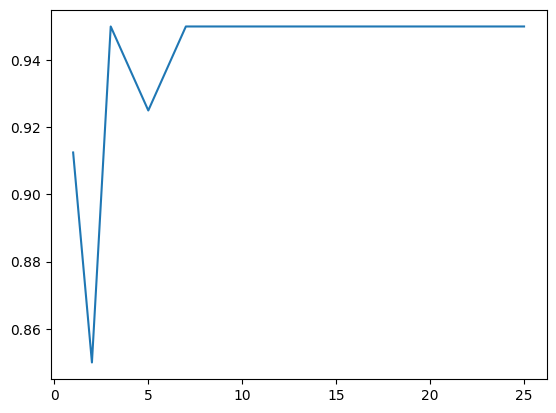

In [34]:
plt.plot(range(1,26), accuracy)


In [39]:
#creating a function for taking input from the user

def predict_output():
  age = int(input("enter your age"))
  salary = int(input("enter your salary"))
  X_new= np.array([[age],[salary]]).reshape(1,2)
  X_new = scaler.transform(X_new)
  if knn.predict(X_new)[0]==0:
    print("will not buy the product")
  else:
    print("will buy the product")


In [41]:
predict_output()

enter your age21
enter your salary25000
will not buy the product


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Creating a meshgrid using the X_train data


In [46]:
a = np.arange(start=X_train[:,0].min()-1, stop=X_train[:,0].max()+1, step=0.01)
b = np.arange(start=X_train[:,1].min()-1, stop=X_train[:,1].max()+1, step=0.01)

XX,YY = np.meshgrid(a,b)



In [47]:
XX.shape


(607, 619)

In [52]:
 input_arr =np.array([XX.ravel(), YY.ravel()]).T

 Z = knn.predict(input_arr)



In [54]:
Z.shape

(375733,)

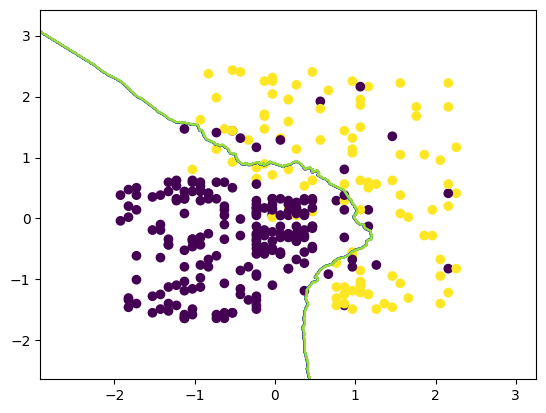

In [57]:
plt.contour(XX,YY,Z.reshape(XX.shape))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)